In [5]:


library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)
library(viridis)

## Import clock, tuberization, photoperiod control genes

In [9]:
CG <- import(file = '../Tables/TableS2_CPT_ATL_DM.csv', 
                   sep =',', header = TRUE, fill = TRUE )

## Import ATL SD/LD Leaf Tuber expression data

In [10]:
#:::::::::::::::::::::::::::::::::::::
SDLD <- import(file = 
('~/Dropbox/Potato/RNA-seq_2/RNAseq_analysis/NetworkAnalyses/ATL_diel_norm_tables_rlog/Results/ATL_diel_norm_avsd_expressed.csv'), 
                   sep =',', header = TRUE, fill = TRUE )

## Get CTP gene expression 

In [11]:
CG_ex <- SDLD %>% filter(target_id %in% CG$target_id) %>% left_join(CG %>% select(Group, Abbreviation, 
                                                                                         Genome, target_id,
                                                                                        Syntelog, Syntelog_manual), by = 'target_id')

In [12]:
CG_ex[1:2,]

,geneID,ZT,Tissue,Condition,mean_expression,std,Average,SD,target_id,Group,Abbreviation,Genome,Syntelog,Syntelog_manual
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_0G007280.1,0,Leaf,LD,5.442988,0.4682651,5.380913,0.2614125,Soltu.Atl_v3.01_0G007280,Clock_Aux,DET1a,ATL_H0,Synt_1088,Synt_1088
2,Soltu.Atl_v3.01_0G007280.1,0,Leaf,SD,5.143092,0.6380301,5.443916,0.3782475,Soltu.Atl_v3.01_0G007280,Clock_Aux,DET1a,ATL_H0,Synt_1088,Synt_1088


## Define plot function

In [13]:
#Defining ribbon SDLD plot 
#::::::::::::::::::::::::::::::::::::


SDLD_ribbon_plot_multiple <- function(df,Abbreviation, columns) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
  ggplot(.,aes(x=ZT,y=mean_expression,col=Condition))+ # this means that all colors below are determined by Condition
   
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=mean_expression,col =Condition, group = Condition))+ #group will separate different genes from the same Condition
  geom_ribbon(aes(ymin=mean_expression-std,ymax=mean_expression+std, fill = Condition, group = Condition),alpha=0.2, linetype = 0)+
  facet_wrap(~target_id, scales = 'free_y', ncol = columns)+
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+

  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Average Expression (rlog)", x="ZT (h)", title = Abbreviation)+
     scale_color_manual(values = c('SD' = '#33539E',     
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) 
   
}


## CO1

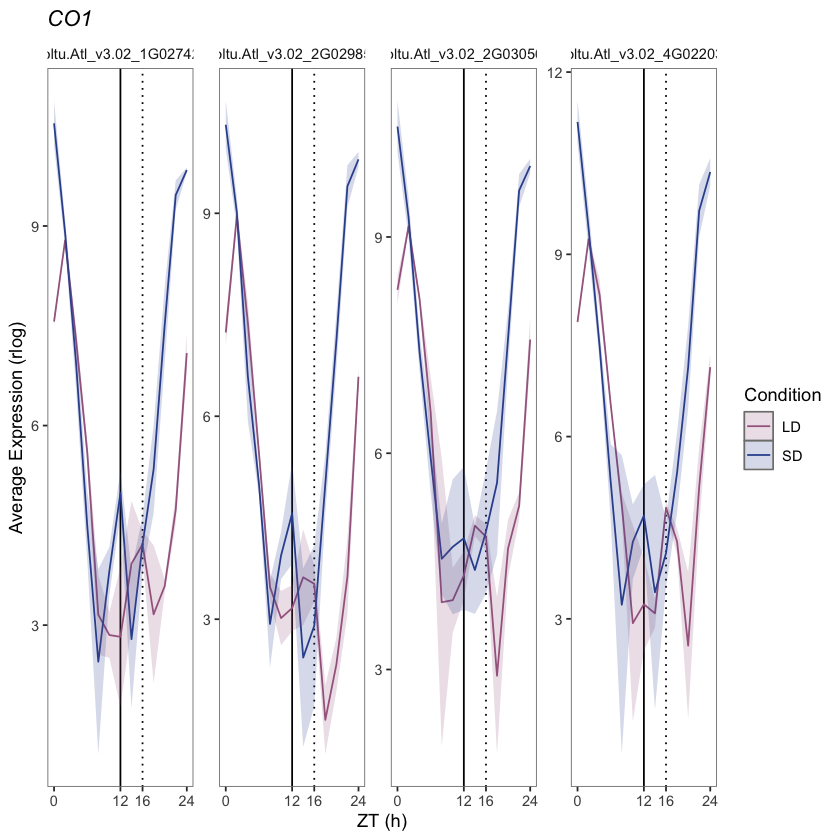

In [14]:
## Plot SD vs LD
CO1_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO1'|Abbreviation == 'CO1b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO1')),4)
CO1_rlog_ribbonPlot 

In [15]:
CO1_rlog_ribbonPlot %>% save_plot(file="./Results/CO1_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO1 tuber

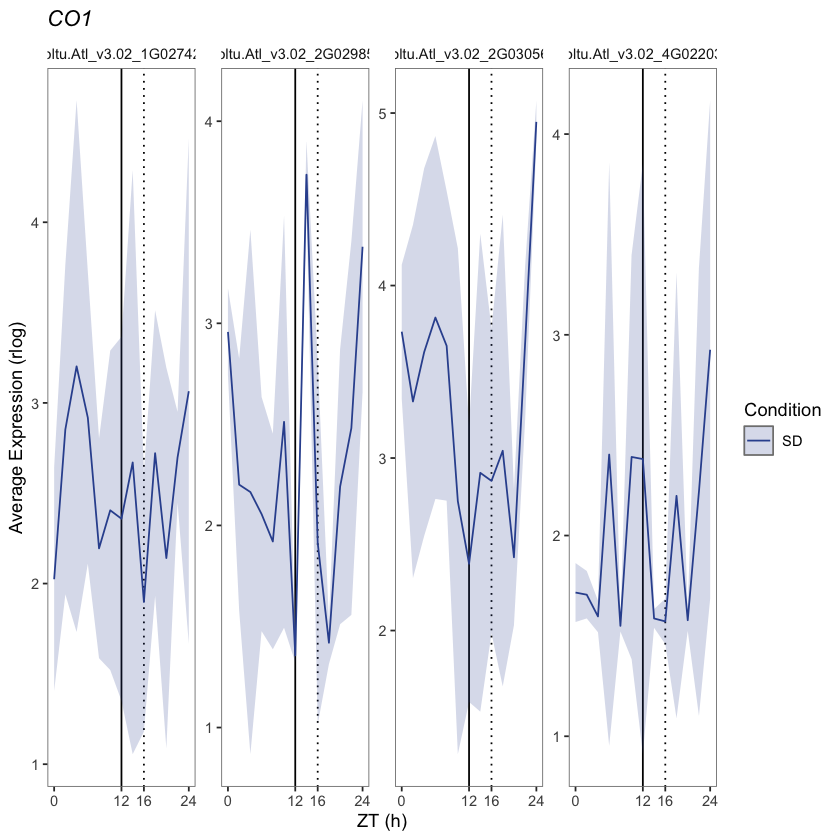

In [16]:
## Plot SD vs LD
CO1_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO1'|Abbreviation == 'CO1b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO1')),4)
CO1_Tuber_rlog_ribbonPlot 
CO1_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO1_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO2

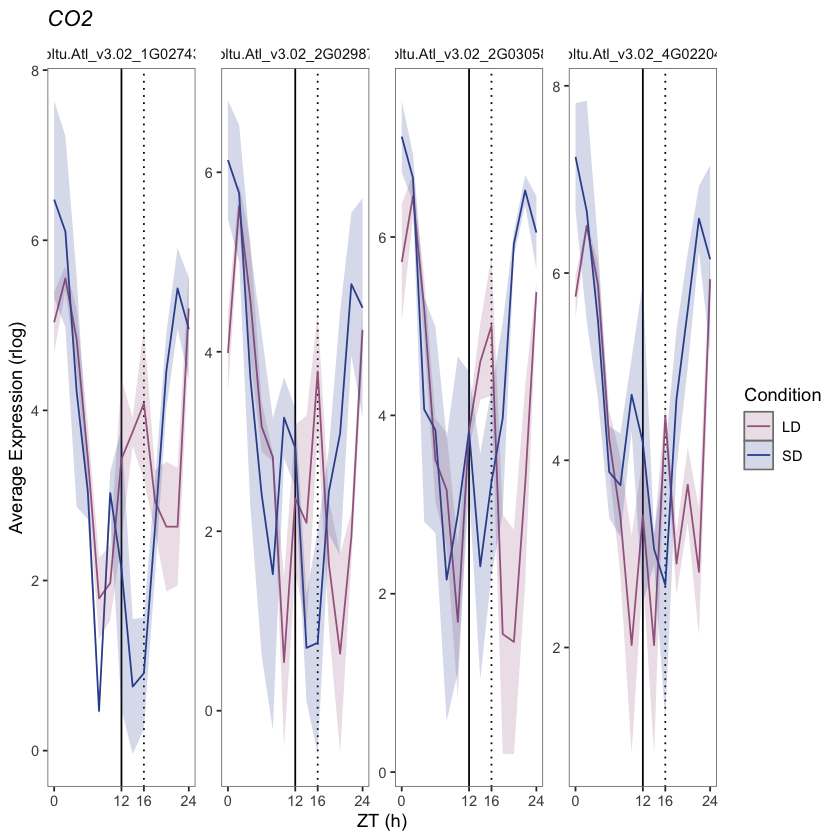

In [17]:
## Plot SD vs LD
CO2_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO2'|Abbreviation == 'CO2b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO2')),4)
CO2_rlog_ribbonPlot 

In [18]:
CO2_rlog_ribbonPlot %>% save_plot(file="./Results/CO2_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO2 in tubers

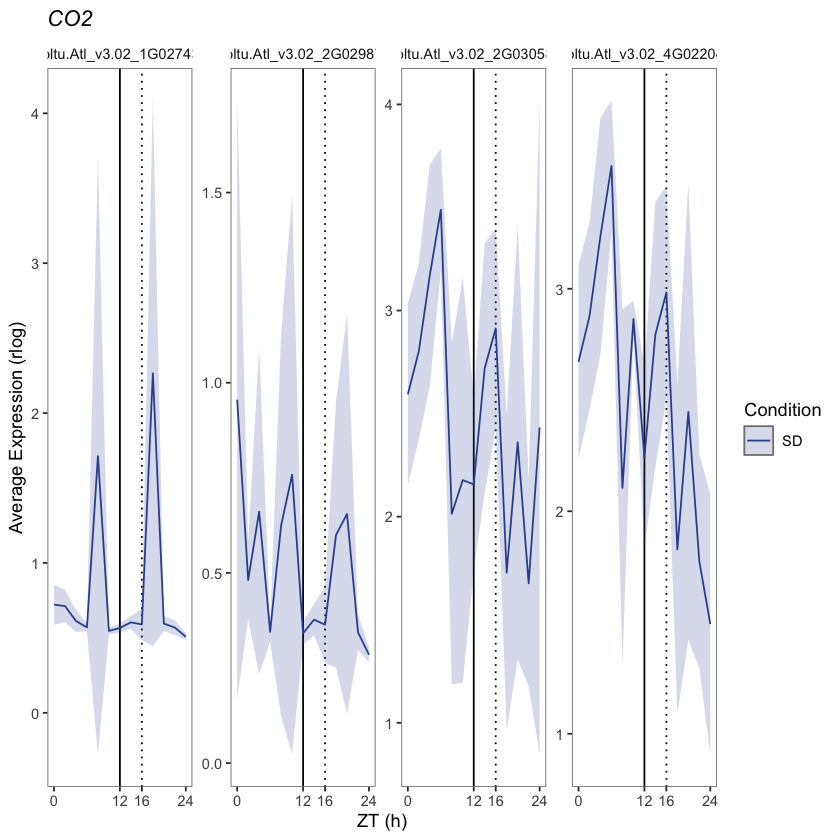

In [19]:
## Plot SD vs LD
CO2_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO2'|Abbreviation == 'CO2b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO2')),4)
CO2_Tuber_rlog_ribbonPlot 
CO2_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO2_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO3

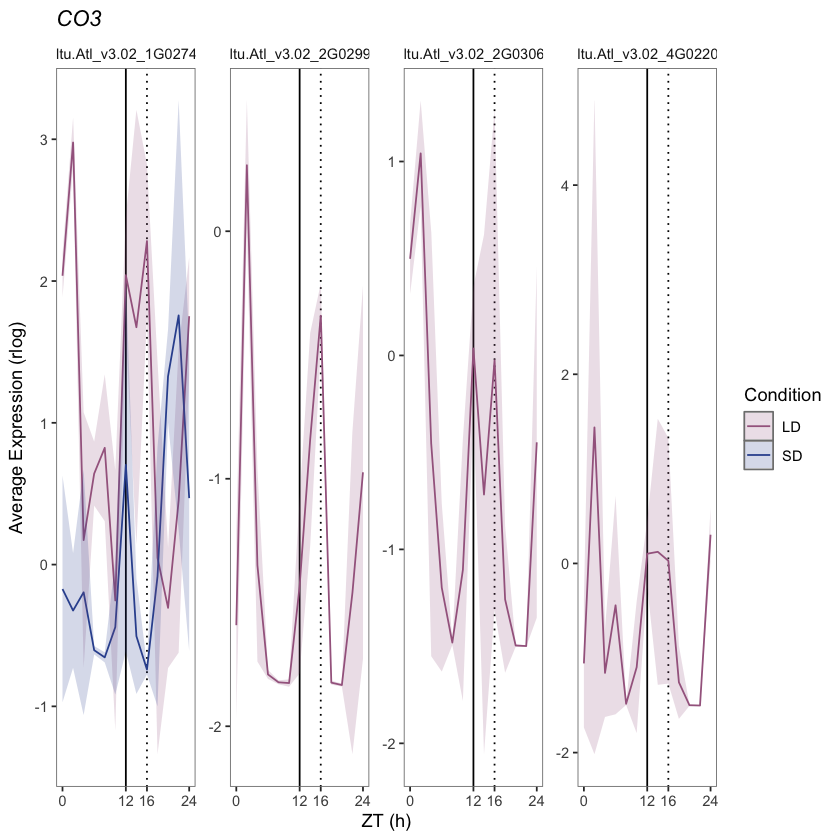

In [30]:
## Plot SD vs LD
CO3_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO3'|Abbreviation == 'CO3b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                         SDLD_ribbon_plot_multiple(expression(italic('CO3')),4)
CO3_rlog_ribbonPlot 

CO3_rlog_ribbonPlot %>% save_plot(file="./Results/CO3_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## CO3 in tubers

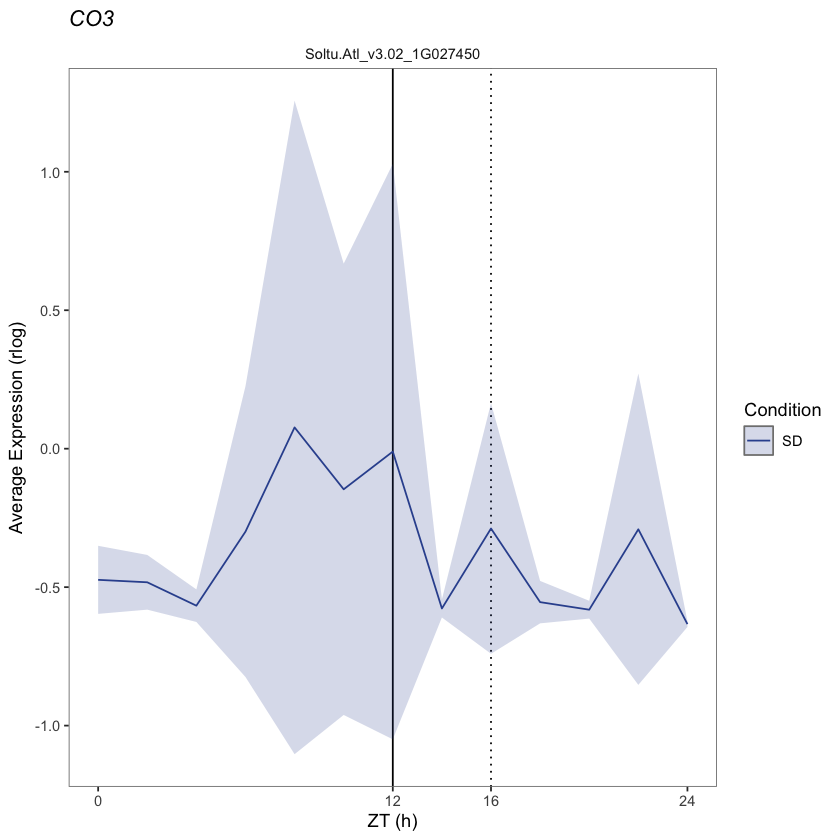

In [28]:
## Plot SD vs LD
CO3_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CO3'|Abbreviation == 'CO3b') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CO3')),4)
CO3_Tuber_rlog_ribbonPlot 

CO3_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/CO3_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 1.5)

## SP5G

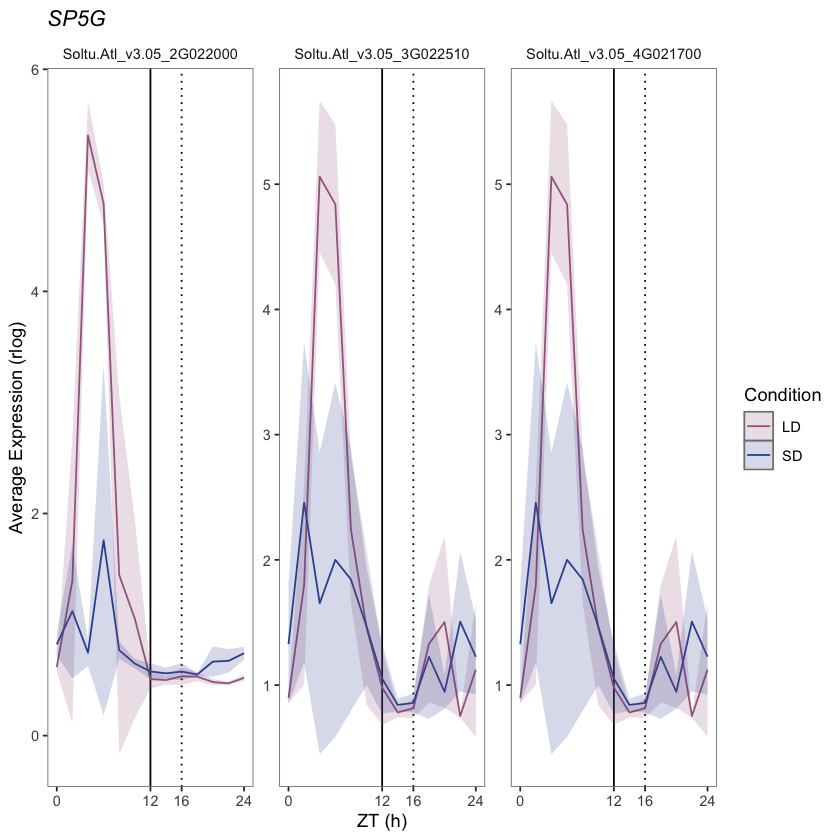

In [22]:
## Plot SD vs LD
SP5G_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'SP5G') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP5G')),4)
SP5G_rlog_ribbonPlot 

SP5G_rlog_ribbonPlot %>% save_plot(file="./Results/SP5G_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3)

## SP5G in tubers

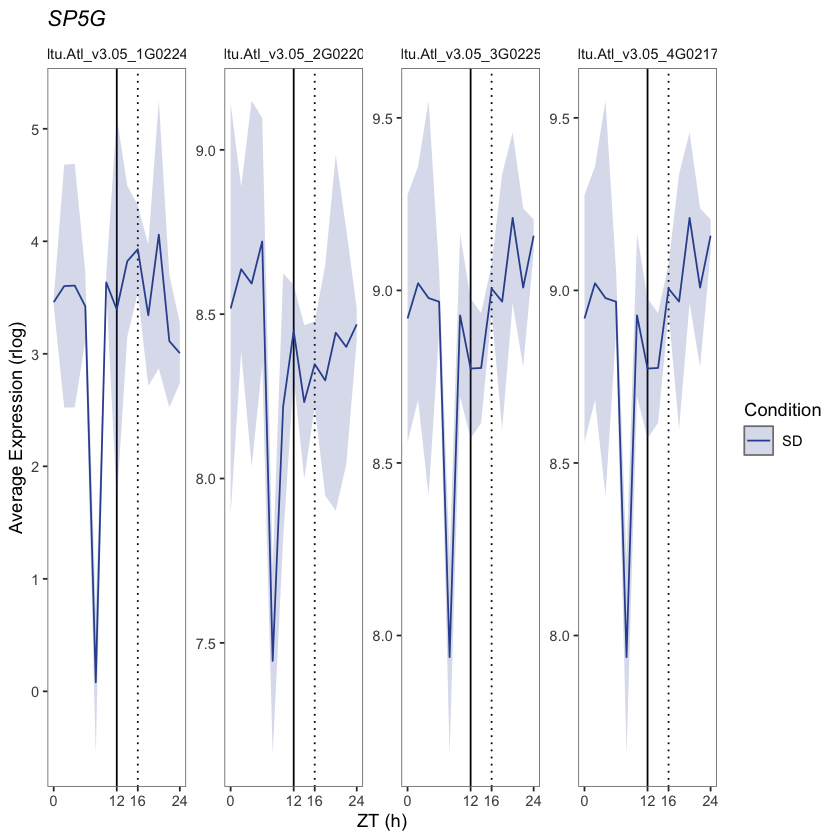

In [23]:
## Plot SD vs LD
SP5G_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'SP5G') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP5G')),4)
SP5G_Tuber_rlog_ribbonPlot 

SP5G_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/SP5G_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## SP6A

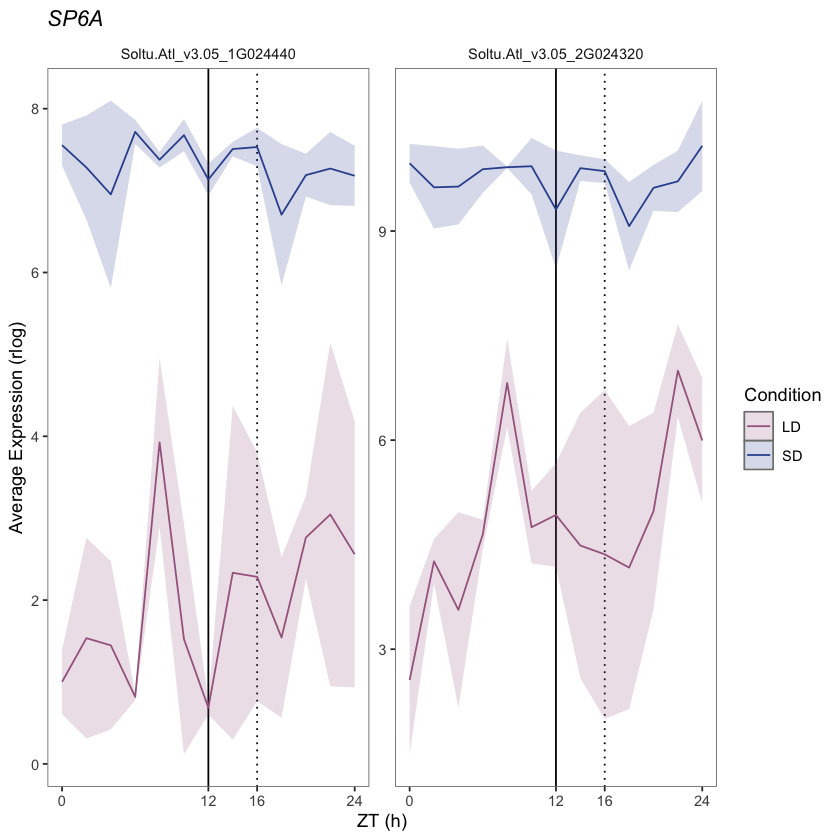

In [24]:
## Plot SD vs LD
SP6A_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'SP6A') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP6A')),4)
SP6A_rlog_ribbonPlot 

SP6A_rlog_ribbonPlot %>% save_plot(file="./Results/SP6A_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 2.25)

## SP6A in tuber

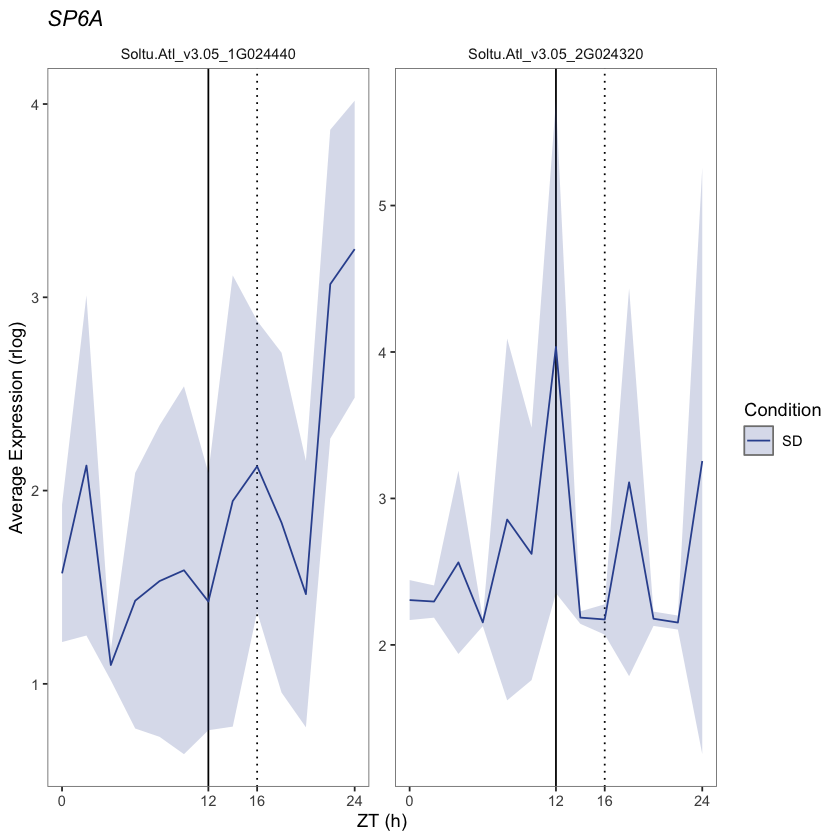

In [25]:
## Plot SD vs LD
SP6A_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'SP6A') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('SP6A')),4)
SP6A_Tuber_rlog_ribbonPlot 

SP6A_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/SP6A_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 2.25)

## CDF1

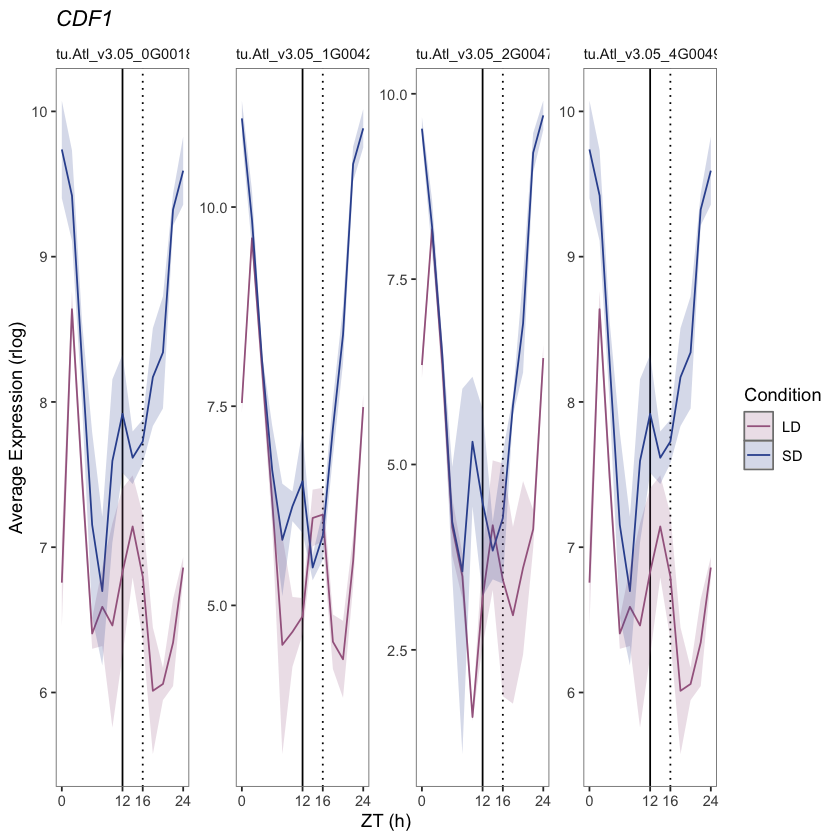

In [26]:
## Plot SD vs LD
CDF1_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'CDF1') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('CDF1')),4)
CDF1_rlog_ribbonPlot 

CDF1_rlog_ribbonPlot %>% save_plot(file="./Results/CDF1_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 4)

## BEL5

In [ ]:
## Plot SD vs LD
BEL5_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'BEL5') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple(expression(italic('BEL5')),4)
BEL5_rlog_ribbonPlot 

BEL5_rlog_ribbonPlot %>% save_plot(file="./Results/BEL5_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3.2)

## BEL5 in tuber

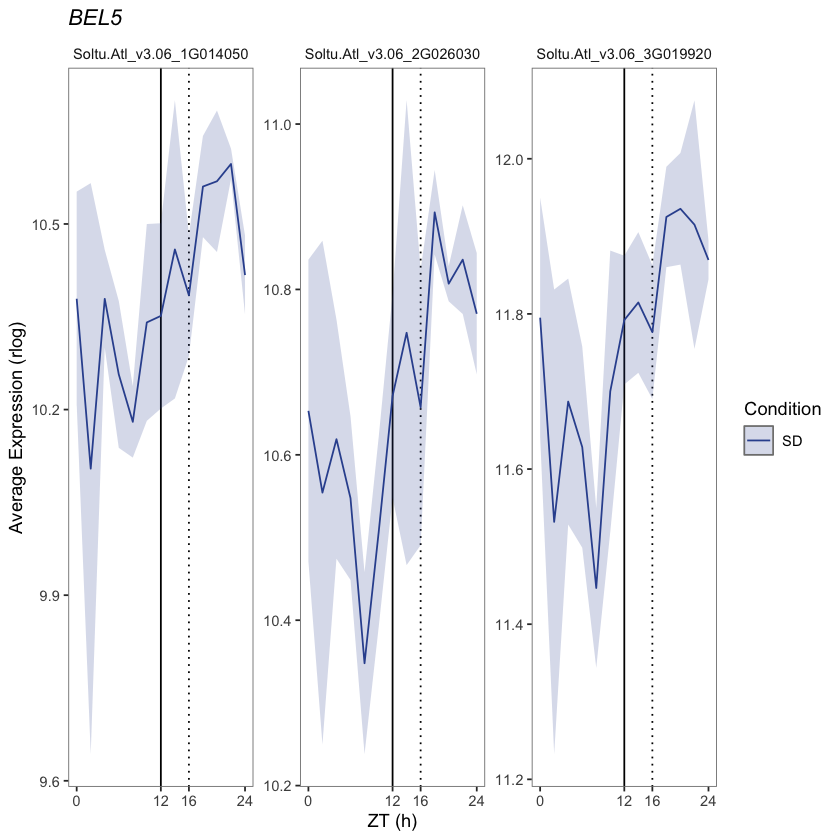

In [27]:
## Plot SD vs LD
BEL5_Tuber_rlog_ribbonPlot <- CG_ex %>% filter (Abbreviation == 'BEL5') %>%  # get only expression data for your genes
                      
filter(Tissue == 'Tuber') %>% 
                        SDLD_ribbon_plot_multiple(expression(italic('BEL5')),4)
BEL5_Tuber_rlog_ribbonPlot 

BEL5_Tuber_rlog_ribbonPlot %>% save_plot(file="./Results/BEL5_Tuber_rlog_ribbonPlot.pdf", base_height = 2.25 , base_asp = 3.2)